## Forecasting out-of-sample data points in time series
  - The stationary time series dataset is split into train and test datasets
  - Autoregressive model is fit on the train dataset
  - Fitted models are used to forecast the test data

In [ ]:
import import_ipynb
import stationarity
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import math
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
VZ_diff = stationarity.VZ_diff

In [3]:
split = int(len(VZ_diff.values)*0.95)
diff_train_VZ = VZ_diff.iloc[:split]
diff_test_VZ = VZ_diff.iloc[split:]

### Autoregressive Model

In [4]:
ar_VZ = AutoReg(diff_train_VZ,lags=4)
ar_fitted_VZ = ar_VZ.fit()

In [5]:
ar_predictions_VZ = ar_fitted_VZ.predict(start=len(diff_train_VZ), 
                                         end=len(diff_train_VZ)+len(diff_test_VZ)-1,
                                         dynamic=False)

ar_predictions_VZ=pd.DataFrame(ar_predictions_VZ)
ar_predictions_VZ.index=diff_test_VZ.index

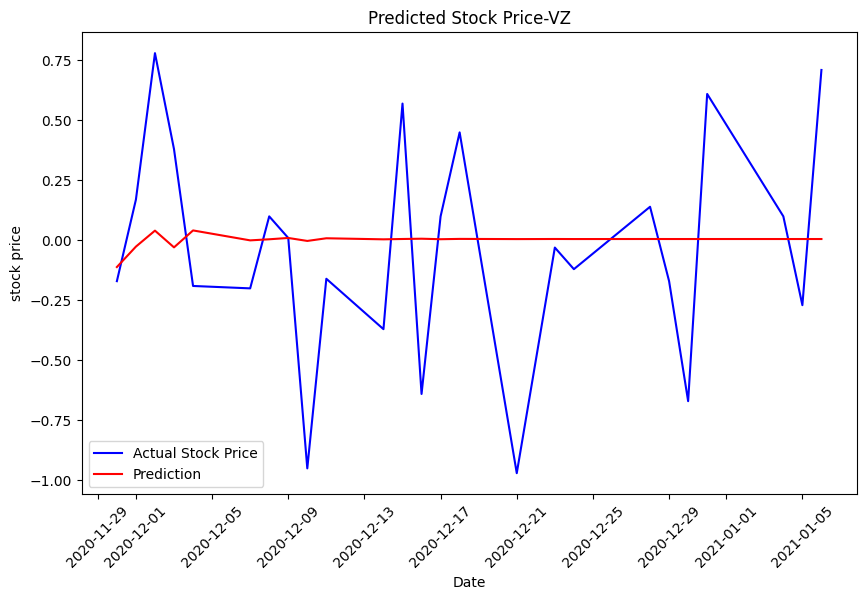

In [6]:
plt.figure(figsize=(10,6))
plt.plot(diff_test_VZ[-split:], label='Actual Stock Price', c='b')
plt.plot(ar_predictions_VZ, c='r', label='Prediction')
plt.title('Predicted Stock Price-VZ')
plt.xlabel('Date')
plt.ylabel('stock price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [7]:
print(math.sqrt(mean_squared_error(diff_test_VZ,ar_predictions_VZ)))

0.4617581049457129
